In [48]:
import numpy as np

In [49]:
import pandas as pd

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('Housing.csv')

In [52]:
housing = df
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [53]:
m = len(housing)
m

545

In [54]:
housing.shape

(545, 13)

In [55]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [56]:
df_test.shape

(109, 13)

In [57]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_newtrain = df_train[num_vars]
df_newtest = df_test[num_vars]
df_newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000


In [58]:
df_newtest.head()

,area,bedrooms,bathrooms,stories,parking,price
239,4000,3,1,2,1,4585000
113,9620,3,1,1,2,6083000
325,3460,4,1,2,0,4007500
66,13200,2,1,1,1,6930000
479,3660,4,1,2,0,2940000


In [59]:
df_newtrain.shape

(436, 6)

In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df_newtrain[num_vars] = scaler.fit_transform(df_newtrain[num_vars])
df_newtrain.head()

C:\Users\Sanaz\AppData\Local\Temp\ipykernel_20664\1883545499.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newtrain[num_vars] = scaler.fit_transform(df_newtrain[num_vars])


,area,bedrooms,bathrooms,stories,parking,price
542,0.124199,0.2,0.0,0.0,0.0,0.000000
496,0.150654,0.2,0.0,0.0,0.0,0.081818
484,0.083821,0.2,0.0,0.0,0.0,0.096970
507,0.122807,0.2,0.0,0.0,0.0,0.072727
252,0.558619,0.4,0.0,0.0,0.0,0.239394


In [61]:
scaler = MinMaxScaler()
df_newtest[num_vars] = scaler.fit_transform(df_newtest[num_vars])
df_newtest.head()

C:\Users\Sanaz\AppData\Local\Temp\ipykernel_20664\745653926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newtest[num_vars] = scaler.fit_transform(df_newtest[num_vars])


,area,bedrooms,bathrooms,stories,parking,price
239,0.203463,0.50,0.0,0.333333,0.333333,0.270000
113,0.690043,0.50,0.0,0.000000,0.666667,0.412667
325,0.156710,0.75,0.0,0.333333,0.000000,0.215000
66,1.000000,0.25,0.0,0.000000,0.333333,0.493333
479,0.174026,0.75,0.0,0.333333,0.000000,0.113333


In [62]:
y_test = df_newtest.pop('price')
x_test = df_newtest.copy()

y_train = df_newtrain.pop('price')
x_train = df_newtrain.copy()

In [63]:
x1 = x_train.values[:, 0]
x2 = x_train.values[:, 1]
x3 = x_train.values[:, 2]
x4 = x_train.values[:, 3]
x5 = x_train.values[:, 4]
y = y_train.values
m = len(y)
print('x =', x1[: 10])
print('y =', y[: 10])
print('m =', m)
len(x1)

x = [0.12419939 0.15065441 0.08382066 0.12280702 0.55861877 0.14842662
 0.13951546 0.55444166 0.12559176 0.11723754]
y = [0.         0.08181818 0.0969697  0.07272727 0.23939394 0.23030303
 0.24545455 0.3030303  0.15757576 0.16363636]
m = 436


436

In [64]:
x_1 = x_test.values[:, 0]
x_2 = x_test.values[:, 1]
x_3 = x_test.values[:, 2]
x_4 = x_test.values[:, 3]
x_5 = x_test.values[:, 4]
y_test = y_test.values
n = len(y_test)
print('x =', x_1[: 10])
print('y =', y_test[: 10])
print('n =', n)
len(x_1)

x = [0.2034632  0.69004329 0.15670996 1.         0.17402597 0.40692641
 0.19047619 0.15844156 0.16121212 0.63636364]
y = [0.27       0.41266667 0.215      0.49333333 0.11333333 0.42333333
 0.17       0.11333333 0.16666667 0.59333333]
n = 109


109

Text(0.5, 1.0, 'Scatter Plot of Training Data')

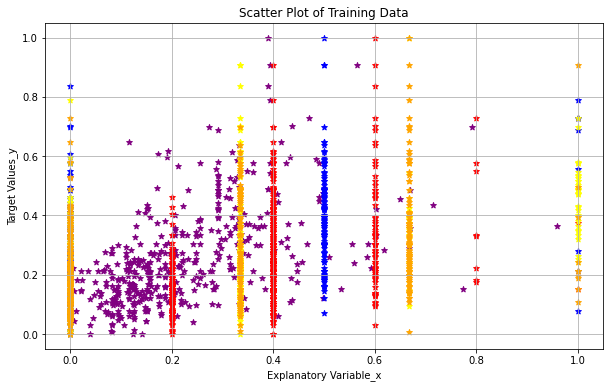

In [65]:
plt.scatter(x1, y, color = 'purple', marker = '*')
plt.scatter(x2, y, color = 'red', marker = '*')
plt.scatter(x3, y, color = 'blue', marker = '*')
plt.scatter(x4, y, color = 'yellow', marker = '*')
plt.scatter(x5, y, color = 'orange', marker = '*')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Explanatory Variable_x')
plt.ylabel('Target Values_y')
plt.title('Scatter Plot of Training Data')

In [66]:
x0 = np.ones((m, 1))
x1 = x1.reshape(m, 1)
x2 = x2.reshape(m, 1)
x3 = x3.reshape(m, 1)
x4 = x4.reshape(m, 1)
x5 = x5.reshape(m, 1)
x1[: 5], x2[: 5], x3[: 5], x4[: 5], x5[: 5]

(array([[0.12419939],
        [0.15065441],
        [0.08382066],
        [0.12280702],
        [0.55861877]]),
 array([[0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.4]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [67]:
X = np.hstack((x0, x1, x2, x3, x4, x5))
X[: 5]

array([[1.        , 0.12419939, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.15065441, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.08382066, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.12280702, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.55861877, 0.4       , 0.        , 0.        ,
        0.        ]])

In [68]:
x_0 = np.ones((n, 1))
x_1 = x_1.reshape(n, 1)
x_2 = x_2.reshape(n, 1)
x_3 = x_3.reshape(n, 1)
x_4 = x_4.reshape(n, 1)
x_5 = x_5.reshape(n, 1)
x_0[: 5], x_1[: 5], x_2[: 5], x_3[: 5], x_4[: 5], x_5[: 5]

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 array([[0.2034632 ],
        [0.69004329],
        [0.15670996],
        [1.        ],
        [0.17402597]]),
 array([[0.5 ],
        [0.5 ],
        [0.75],
        [0.25],
        [0.75]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[0.33333333],
        [0.        ],
        [0.33333333],
        [0.        ],
        [0.33333333]]),
 array([[0.33333333],
        [0.66666667],
        [0.        ],
        [0.33333333],
        [0.        ]]))

In [69]:
X_test = np.hstack((x_0, x_1, x_2, x_3, x_4, x_5))
X_test[: 5]

array([[1.        , 0.2034632 , 0.5       , 0.        , 0.33333333,
        0.33333333],
       [1.        , 0.69004329, 0.5       , 0.        , 0.        ,
        0.66666667],
       [1.        , 0.15670996, 0.75      , 0.        , 0.33333333,
        0.        ],
       [1.        , 1.        , 0.25      , 0.        , 0.        ,
        0.33333333],
       [1.        , 0.17402597, 0.75      , 0.        , 0.33333333,
        0.        ]])

In [70]:
theta = np.zeros((6, 1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [71]:
def compute_loss(X, y, theta, lambda_value):
   
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    sqrthetas = np.square(theta)
    regularization =  1 / (2 * m) * (lambda_value * np.sum(sqrthetas))
    J = 1 / (2 * m) * np.sum(sqrErrors) + regularization
  

    return J

In [72]:
def compute_validation_loss(X_test, y_test, theta):
   
    predictions = X_test.dot(theta)
    errors = np.subtract(predictions, y_test)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)


    return J

In [87]:
 lambda_value = 0.01

In [88]:
loss = compute_loss(X, y, theta, lambda_value)
print('The loss for all thetas =', loss)

The loss for all thetas = 0.006102391037420944


In [89]:
def gradient_descent(X, y, theta, alpha, iterations, X_test, y_test, lambda_value): 
     
    loss_history = np.zeros(iterations)
    validation_loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors) 
        theta = np.multiply(theta, (1 - (alpha * lambda_value / m))) - sum_delta
        loss_history[i] = compute_loss(X, y, theta, lambda_value)
        validation_loss_history[i] = compute_validation_loss(X_test, y_test, theta)
        
       
    return theta, loss_history, validation_loss_history   

In [90]:
theta = [0, 0, 0, 0, 0, 0]
iterations = 5000;
alpha = 0.1;

In [91]:
theta, loss_history, validation_loss_history = gradient_descent (X, y, theta, alpha, iterations, X_test, y_test, lambda_value)
print('Final value of theta =', theta)
print('loss_history =', loss_history)
print('validation_loss_history =', validation_loss_history)

Final value of theta = [0.03614922 0.4311086  0.09913454 0.2059613  0.13662522 0.09094788]
loss_history = [0.03825884 0.03099705 0.02558903 ... 0.00609742 0.00609742 0.00609742]
validation_loss_history = [0.01058428 0.0085561  0.00703269 ... 0.00135587 0.00135587 0.00135587]


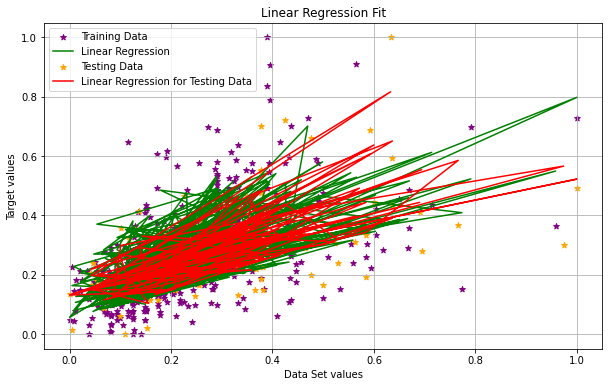

In [92]:
plt.scatter(X[:, 1], y, color = 'purple', marker = '*', label = 'Training Data')
plt.plot(X[:, 1], X.dot(theta), color = 'green', label = 'Linear Regression')
plt.scatter(X_test[:, 1], y_test, color = 'orange', marker = '*', label = 'Testing Data')
plt.plot(X_test[:, 1], X_test.dot(theta), color = 'red', label = 'Linear Regression for Testing Data')

plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Data Set values')
plt.ylabel('Target values')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

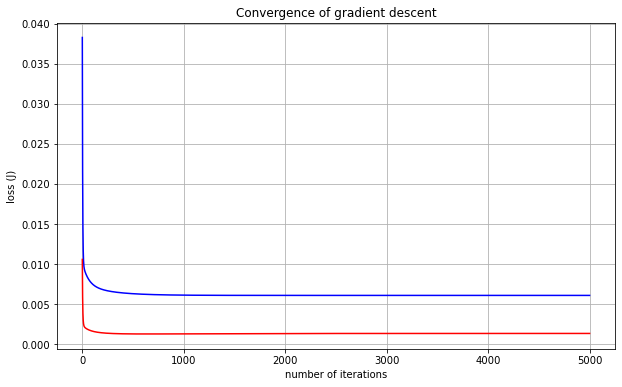

In [93]:
plt.plot(range(1, iterations + 1), loss_history, color = 'blue')
plt.plot(range(1, iterations + 1), validation_loss_history, color = 'red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('number of iterations')
plt.ylabel('loss (J)')
plt.title('Convergence of gradient descent')